In [1]:
import pandas as pd

In [2]:
ny = pd.read_csv('ny_reviews.csv')
ny.head()

,camis,dba,boro,phone,inspection_date,latitude,longitude,cuisine_description,action,score,grade,full_address,violation_code,violation_description,last_inspection_date,concatenated_reviews
0,30075445,MORRIS PARK BAKE SHOP,Bronx,7188924968,2021-08-10,40.848231,-73.855972,Bakery Products/Desserts,Violations cited,5,A,1007 MORRIS PARK AVENUE 10462,06E,"Sanitized equipment or utensil, including in-u...",2020-08-10,NaN
1,30075445,MORRIS PARK BAKE SHOP,Bronx,7188924968,2023-01-31,40.848231,-73.855972,Bakery Products/Desserts,Closed,21,B,1007 MORRIS PARK AVENUE 10462,06D 08C 10D 10F 04L 04N 06C 04H,"Food contact surface not properly washed, rins...",2021-08-10,NaN
2,30075445,MORRIS PARK BAKE SHOP,Bronx,7188924968,2023-02-03,40.848231,-73.855972,Bakery Products/Desserts,Re-opened,13,A,1007 MORRIS PARK AVENUE 10462,02G 10F,Cold TCS food item held above 41 °F; smoked or...,2023-01-31,NaN
3,30075445,MORRIS PARK BAKE SHOP,Bronx,7188924968,2023-08-01,40.848231,-73.855972,Bakery Products/Desserts,Violations cited,38,C,1007 MORRIS PARK AVENUE 10462,04L 08A 05H,Evidence of mice or live mice in establishment...,2023-02-03,NaN
4,30075445,MORRIS PARK BAKE SHOP,Bronx,7188924968,2023-08-22,40.848231,-73.855972,Bakery Products/Desserts,Violations cited,12,A,1007 MORRIS PARK AVENUE 10462,08A 08C 04L,Establishment is not free of harborage or cond...,2023-08-01,NaN


In [3]:
ny.shape

(59989, 16)

In [4]:
ny = ny[ny.concatenated_reviews.notna()]
ny.shape


(4098, 16)

In [5]:
ny = ny.drop(columns=['latitude', 'longitude', 'phone', 'action', 'full_address', 'violation_code', 'violation_description'])

In [6]:
ny.head()

,camis,dba,boro,inspection_date,cuisine_description,score,grade,last_inspection_date,concatenated_reviews
155,40365904,MEE SUM CAFE,Manhattan,2021-10-13,Coffee/Tea,67,C,2020-10-13,Very authentic place. To the point that I ne...
156,40365904,MEE SUM CAFE,Manhattan,2021-11-24,Coffee/Tea,24,B,2021-10-13,Really great classic Chinese comfort food. Gre...
157,40365904,MEE SUM CAFE,Manhattan,2022-06-27,Coffee/Tea,50,C,2021-11-24,Great spot cheap eats Didn’t have time to take...
158,40365904,MEE SUM CAFE,Manhattan,2022-09-30,Coffee/Tea,59,C,2022-06-27,Great Place for some Home Cooking Friendly a...
159,40365904,MEE SUM CAFE,Manhattan,2023-04-14,Coffee/Tea,36,C,2022-09-30,Great dim sum cafe open early!! Popular place...


In [7]:
ny.to_csv('reviews_gpt.csv')

In [8]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4098 entries, 155 to 59941
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   camis                 4098 non-null   int64 
 1   dba                   4098 non-null   object
 2   boro                  4098 non-null   object
 3   inspection_date       4098 non-null   object
 4   cuisine_description   4098 non-null   object
 5   score                 4098 non-null   int64 
 6   grade                 4098 non-null   object
 7   last_inspection_date  4098 non-null   object
 8   concatenated_reviews  4098 non-null   object
dtypes: int64(2), object(7)
memory usage: 320.2+ KB


In [9]:
# Regex pattern for finding emojis
def extract_emojis(text):
    emoji_pattern = regex.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=regex.UNICODE)
    
    return ' '.join(emoji_pattern.findall(text))


In [10]:
import regex

In [11]:

# Apply the function to create a new column with only emojis
ny['emoji_reviews'] = ny['concatenated_reviews'].apply(extract_emojis)

# Perform the split and stack to get all individual emojis
all_emojis = ny['emoji_reviews'].str.split(expand=True).stack()

# Frequency count of all emojis
all_freq = pd.Series(all_emojis).value_counts().sort_values(ascending=False).astype(int)


In [12]:
all_freq.head(20)  # Display the top emojis by frequency



😋     643
👍     547
👌     281
❤️    280
😊     187
😍     171
🤤     122
🍕     106
👏      91
🔥      84
👎      80
😂      79
♀️     77
💯      74
😁      68
🥰      65
️      62
😉      62
🤩      60
😀      56
Name: count, dtype: int64

In [13]:
all_emojis

157    0      🇭🇰
161    0       😒
       1       👌
186    0      ❤️
187    0     👍👍👍
            ... 
59811  15     👍🏻
       16     👌🏼
       17      😂
59885  0       😂
59941  0       🥐
Length: 8647, dtype: object

/usr/local/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


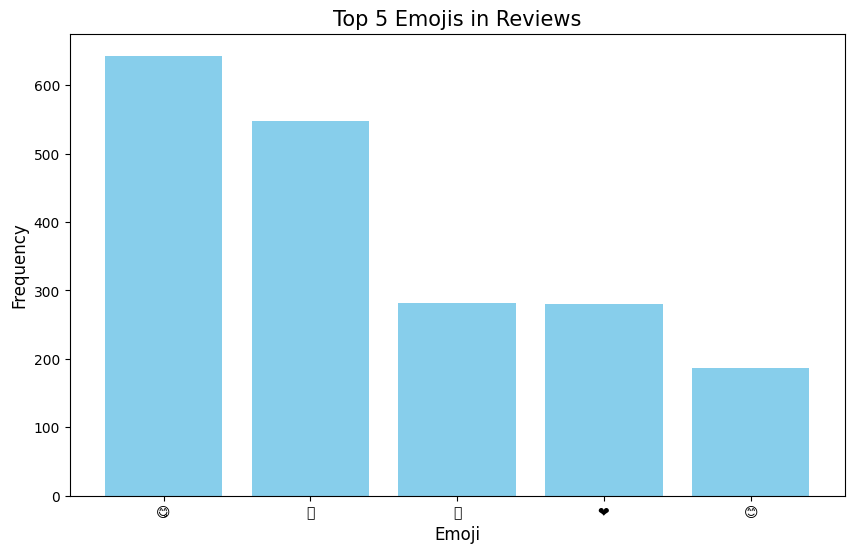

In [14]:
import matplotlib.pyplot as plt

# Get the top 5 emojis and their counts for plotting
top_emojis = all_freq.head(5).index
top_counts = all_freq.head(5).values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_counts, color='skyblue')

# Add title and labels
plt.title('Top 5 Emojis in Reviews', fontsize=15)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


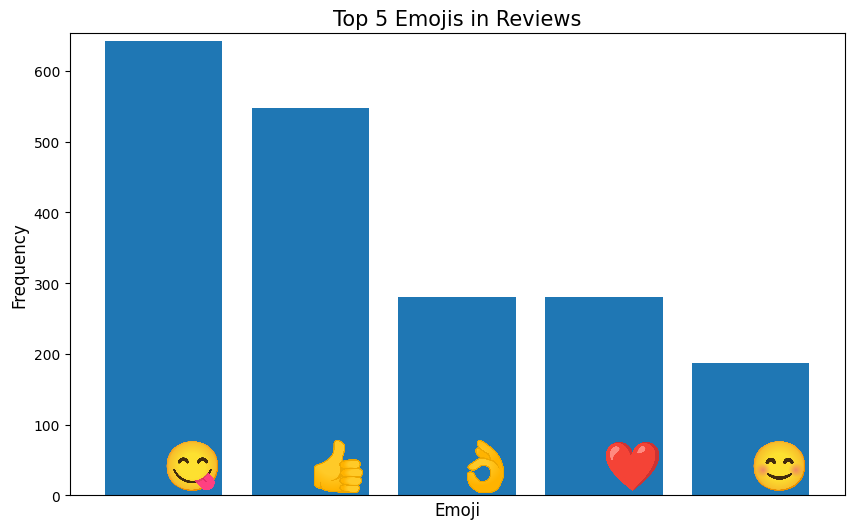

In [24]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the function to place an emoji image at given coordinates
def offset_image(coord, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0), xycoords='data', frameon=False, pad=0, box_alignment=(0.0, 0.0))
    ax.add_artist(ab)

# Your existing code to plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_counts)

# Remove the current labels
plt.xticks([])

# Set the new emoji labels using the offset_image function
for i, emoji in enumerate(top_emojis):
    offset_image(i, emoji, plt.gca())

# Adjust the axis and padding if necessary
plt.ylim(0, max(top_counts) + 10)
plt.tick_params(axis='x', which='major', pad=15)

# Add title and labels with default font
plt.title('Top 5 Emojis in Reviews', fontsize=15)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


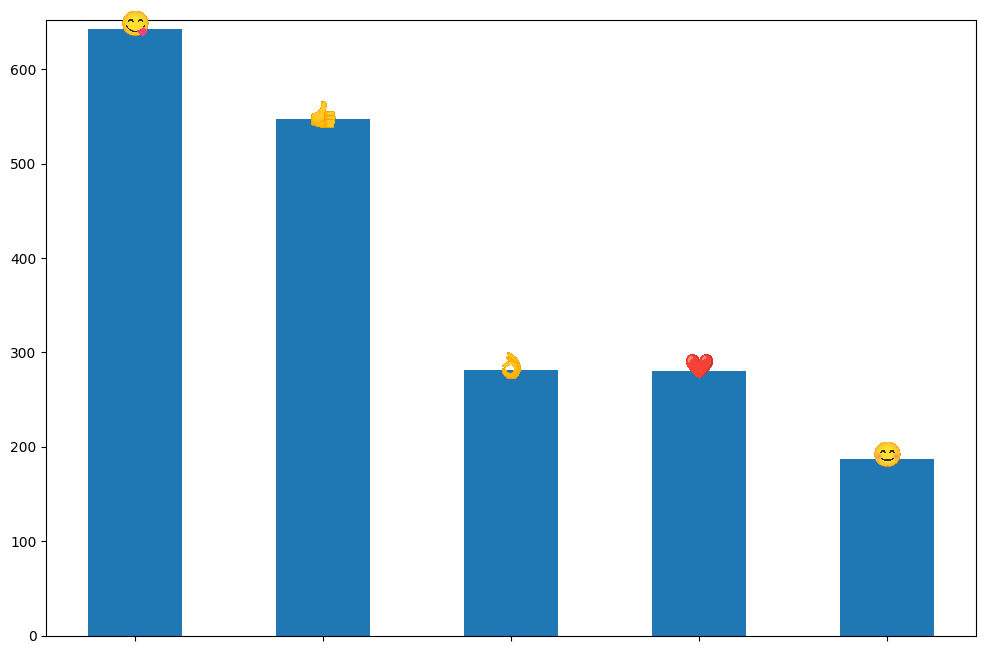

In [17]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def offset_image(coords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.04)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coords[0], coords[1]), frameon=False, pad=0)
    ax.add_artist(ab)

emojis = top_emojis  # your top emojis list
values = top_counts  # your top counts list

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(range(len(emojis)), values, width=0.5, align="center")
ax.set_xticks(range(len(emojis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, max(values) + 10))  # Adjusted to add some space above bars

for i, e in enumerate(emojis):
    offset_image([i, values[i] + 5], e, ax)  # Adjust the positioning as needed

plt.show()
